In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\INES\chp\chp_data_oneyear\chp_data_oneyear\Batch 1\data_127-0-0-1_2024-12-20 (0).csv", encoding = 'cp1252', sep = ';', skiprows=1)

In [4]:
data.head(1)

,Description,Temperatur Vorlauf BHKW 2 (Heizzentrale),Temperatur Vorlauf BHKW 1 (Heizzentrale),Volumenstrom BHKW 2 (Heizzentrale),Betriebszustand BHKW 2 (Heizzentrale),Heizleistung BHKW 2 (Heizzentrale),Stromzähler BHKW 2 (Heizzentrale) Leistung,Betriebszustand BHKW 1 (Heizzentrale),Temperatur Rücklauf BHKW 1 (Heizzentrale),Heizleistung BHKW 1 (Heizzentrale),Temperatur Rücklauf BHKW 2 (Heizzentrale),Stromzähler BHKW 1 (Heizzentrale) Leistung,Volumenstrom BHKW 1 (Heizzentrale)
0,2024/12/15 00:00:00,86.5,81.1,2.51,0.0,102.7,NaN,1.0,52.8,107.56,53.2,NaN,3.05


In [5]:
chp1 = data.loc[:, data.columns.str.contains('BHKW 2')]

In [6]:
chp1.head()

,Temperatur Vorlauf BHKW 2 (Heizzentrale),Volumenstrom BHKW 2 (Heizzentrale),Betriebszustand BHKW 2 (Heizzentrale),Heizleistung BHKW 2 (Heizzentrale),Stromzähler BHKW 2 (Heizzentrale) Leistung,Temperatur Rücklauf BHKW 2 (Heizzentrale)
0,86.50,2.51,0.0,102.70,NaN,53.20
1,86.65,2.52,0.0,103.36,50.60,53.20
2,86.50,2.52,0.0,103.26,50.48,53.20
3,86.55,2.52,0.0,103.35,50.60,53.25
4,86.55,2.54,0.0,103.80,50.60,53.30


In [7]:
chp1['Time'] = data['Description']

chp1['Time']= pd.to_datetime(chp1['Time'])
chp1.set_index('Time', inplace= True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_25520\1299648038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['Time'] = data['Description']
C:\Users\Aqib\AppData\Local\Temp\ipykernel_25520\1299648038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['Time']= pd.to_datetime(chp1['Time'])


In [8]:
chp1.index.dtype
# data['Description'].dtype


dtype('<M8[ns]')

In [9]:
chp1.columns

Index(['Temperatur Vorlauf BHKW 2 (Heizzentrale)',
       'Volumenstrom BHKW 2 (Heizzentrale)',
       'Betriebszustand BHKW 2 (Heizzentrale)',
       'Heizleistung BHKW 2 (Heizzentrale)',
       'Stromzähler BHKW 2 (Heizzentrale) Leistung',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)'],
      dtype='object')

In [10]:
clmns = {'Temperatur Vorlauf BHKW 2 (Heizzentrale)' : 'Temperatur Vorlauf',
       'Betriebszustand BHKW 2 (Heizzentrale)' : 'Betriebszustand',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)': 'Temperatur Rücklauf',
        'Heizleistung BHKW 2 (Heizzentrale)': 'Heizleistung',
        'Stromzähler BHKW 2 (Heizzentrale) Leistung': 'Stromzähler Leistung',
        'Volumenstrom BHKW 2 (Heizzentrale)': 'Volumenstrom'}

In [11]:
chp1.rename(columns = clmns, inplace = True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_25520\209734648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1.rename(columns = clmns, inplace = True)


In [12]:
chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_25520\3234059368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)


In [13]:
startup = chp1[(chp1['Heizleistung'] < 100) & (chp1['Betriebszustand'] == 0)]

In [14]:
firstswitch = startup[startup['switch']].index[0]  #the switch column has bool datatype

In [15]:
startup = startup.loc[firstswitch:,:]  # just to start from the first off to start up switch

In [16]:
for row in startup.itertuples():
    print(row.Index)

2024-12-15 05:07:00
2024-12-15 05:08:00
2024-12-15 05:09:00
2024-12-15 05:10:00
2024-12-15 05:11:00
2024-12-15 05:12:00
2024-12-15 05:13:00
2024-12-15 05:14:00
2024-12-15 05:15:00
2024-12-15 05:16:00
2024-12-15 05:17:00
2024-12-15 05:18:00
2024-12-15 05:20:00
2024-12-15 05:21:00
2024-12-15 05:22:00
2024-12-15 05:23:00
2024-12-15 05:24:00
2024-12-15 05:25:00
2024-12-15 06:19:00
2024-12-15 06:20:00
2024-12-15 06:21:00
2024-12-15 06:22:00
2024-12-15 06:23:00
2024-12-15 06:24:00
2024-12-15 06:25:00
2024-12-15 06:26:00
2024-12-15 06:27:00
2024-12-15 06:28:00
2024-12-15 06:29:00
2024-12-15 06:30:00
2024-12-15 06:31:00
2024-12-15 06:32:00
2024-12-15 06:33:00
2024-12-15 06:34:00
2024-12-15 10:01:00
2024-12-15 10:02:00
2024-12-15 10:03:00
2024-12-15 10:04:00
2024-12-15 10:05:00
2024-12-15 10:06:00
2024-12-15 10:07:00
2024-12-15 10:08:00
2024-12-15 10:09:00
2024-12-15 10:10:00
2024-12-15 10:11:00
2024-12-15 10:16:00
2024-12-15 10:17:00
2024-12-15 10:18:00
2024-12-15 12:47:00
2024-12-15 12:50:00


In [17]:
# startup['counter'] = np.full(len(startup), 0)

In [18]:
val = 0
Tplus_list = []
for i, rows in enumerate(startup.itertuples()):
    if rows.switch:  # check if switch is true
        val = 0
    
    Tplus_list.append(val)
    val += 1

In [19]:
Tplus_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [20]:
startup['T_plus'] = Tplus_list

In [21]:
import matplotlib.pyplot as plt

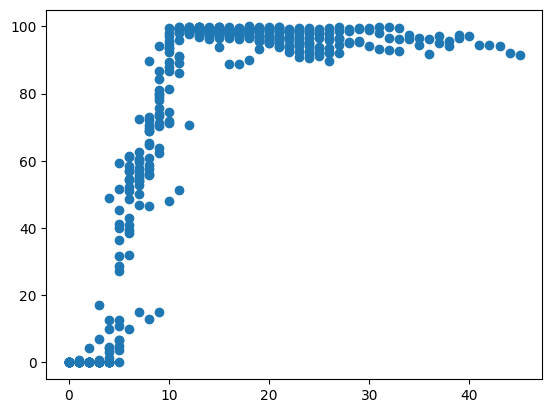

In [22]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')

In [1]:
# pip install scikit-learn

### line fit

In [33]:
coefficients = np.polyfit(startup['T_plus'], startup['Heizleistung'], 1)
slope, intercept = coefficients

### Finding average

In [37]:
startup.loc[startup['T_plus']<16, 'Heizleistung'].mean()

52.6126953125